<a href="https://colab.research.google.com/github/amazzoli/Quantitative_immunology/blob/main/notebooks/Random_number_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Try to implement a naive pseudo random number generator using the Linear Congruent Generator, https://en.wikipedia.org/wiki/Linear_congruential_generator.

It is a discrete map:

$$
X_{n+1} = (a X_n + c) \text{ mod } m
$$

where:
- $m > 0$ is the "**modulus**". It sets the period of the sequence, after $m$ iterations it will be repeted.
- $0 < a < m$ the "**multiplier**"
- $0 \le c < m$ the "**increment**"
- $0 \le X_0 < m$ the "**seed**" or "start value"

To have a sequence of effectively random numbers the parameters have to be properly chosen (a lot of mathematics behind...).
Still, if you know the parameters and $X_n$ the next value can be easily obtained (this is the drawback of pseudo random number generation).

### Write a function that generate a sequence using LCG

In [ ]:
def next_x(x, a, c, m):
  return (a * x + c) % m

def generate_sequence(seed, a, c, m, size):
  seq = [seed]
  for _ in range(size):
    seq.append(next_x(seq[-1], a, c, m))
  return np.array(seq)

Let's see some non-random sequences that the map can provide.
This is to show you that in some case the map is not random at all...

Note the periodicity of the formula: after $m$ generated numbers the sequence will repeat again. So, the best that we can onbtain is a random sequence for the first $m$ outcomes.

### Try $m=11$, $a=c=1$, what do you get?

Is it random over period $m$?

In [ ]:
m = 11
a = 1;
c = 1;

s = generate_sequence(4, a, c, m, 2*m)
print (s)

[ 4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4]


### Try $m=11$, $a=3$, $c=0$ what do you get?

Is it random over period $m$?

In [ ]:
m = 11
a = 3;
c = 0;

s = generate_sequence(4, a, c, m, 2*m)
print (s)

[4 1 3 9 5 4 1 3 9 5 4 1 3 9 5 4 1 3 9 5 4 1 3]


### Generate a random sequence with the proposed parameters. 

Choose sufficiently large size for the sequence.
Normalize the outcomes between 0 and 1.


In [ ]:
m = 2147483648
a = 214013;
c = 2531011;
size = 100000

s = generate_sequence(1234567, a, c, m, size) / m

Now generate the histogram of your normalized outcomes. Is it a propoper random uniform distribution?

Be aware that there will be some "noise" on the height of the histogram-bar counts. You can compute the typical spread of the points around the expected histogram-bar height (which is *seq_size / n_bins*) since you know that the probability to have $n$ counts in a bin of length $\Delta x$ is a binomial with variance:

$$
Var(n) = \text{seq_size}  \Delta x (1 - \Delta x) = \frac{\text{seq_size}}{\text{n_bins}} \left( 1 - \frac{1}{\text{n_bins}} \right)
$$

Most of the bar heights should fall within $\langle n \rangle \pm 2 * \sqrt{Var(n)}$. 

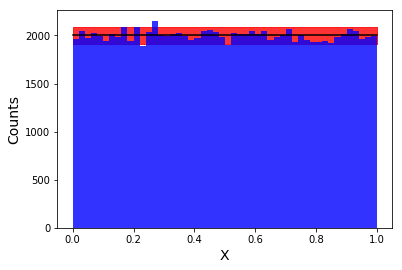

In [ ]:
n_bins = 50

# Error assuming a binomial for the points in the bin 
std = np.sqrt(size/n_bins*(1-1/n_bins))

plt.xlabel('X', fontsize=14)
plt.ylabel('Counts', fontsize=14)
x = np.linspace(0,1,30)
plt.plot(x, np.ones(len(x))*size/n_bins, color='black')

plt.fill_between(x, np.ones(len(x))*size/n_bins + 2 * std, np.ones(len(x))*size/n_bins - 2 * std, 
                 color = 'red', alpha=0.8)

h = plt.hist(s, n_bins, color='blue', alpha=0.8)

Actually to really test if a sequence is at random one should perform several statistical tests..
https://www.random.org/analysis/
